<a href="https://colab.research.google.com/github/kjay94/Python-code/blob/main/MODEL_OVERFITTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1.Synthetic data
#1500 instances - 0 or 1- binary problem
#class 1 3 Gaussian distribution -[6,14], [10,6][14,14] = 750 instances
#class 0 - uniform distribution - 20 = 750 instances

In [2]:
import numpy as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
#matplotlib inline

In [5]:
from numpy.random import random

In [6]:
N=1500

In [7]:
mean1=[6,14]

In [8]:
mean2=[10,6]

In [9]:
mean3=[14,14]

In [10]:
cov=[[3.5, 0],[0,3.5]]

In [11]:
cov

[[3.5, 0], [0, 3.5]]

In [12]:
import numpy as np

In [13]:
np.random.seed(50)

In [14]:
X=np.random.multivariate_normal(mean1,cov, int(N/6))

In [15]:
X.shape

(250, 2)

In [16]:
X[0]

array([ 3.0808485 , 13.94204621])

In [17]:
X[:,1].sum()

3447.8139448036873

In [18]:
3447.8139448036873/250

13.79125577921475

In [19]:
X= np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))

In [20]:
X.shape

(500, 2)

In [21]:
X= np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))


In [22]:
X.shape

(750, 2)

In [23]:
X=np.concatenate((X, 20*np.random.rand(int(N/2), 2)))

In [24]:
X.shape

(1500, 2)

In [25]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [26]:
y=np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

In [27]:
y

array([1., 1., 1., ..., 0., 0., 0.])

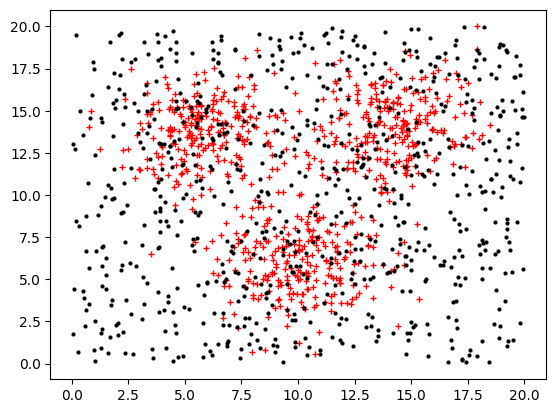

In [28]:
plt.plot(X[:int(N/2), 0], X[:int(N/2),1], 'r+', X[int(N/2):,0],X[int(N/2):,1],'k.', ms=4)

In [29]:
#tRAINING AND TEST SET CREATION
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8, random_state=11)

In [31]:
X_train.shape

(1200, 2)

In [32]:
X_test.shape

(300, 2)

In [33]:
X_train[0]

array([ 4.62728194, 15.56260526])

In [34]:
from sklearn import tree

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
maxDepth=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [37]:
len(maxDepth)

17

In [38]:
trainAcc=np.zeros(len(maxDepth))

In [39]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
testAcc=np.zeros(len(maxDepth))

In [41]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
index=0

In [43]:
for depth in maxDepth:
  clf=tree.DecisionTreeClassifier(max_depth=depth)
  clf=clf.fit(X_train, y_train)
  y_predTrain=clf.predict(X_train)
  y_predTest=clf.predict(X_test)
  trainAcc[index]=accuracy_score(y_train, y_predTrain)
  testAcc[index]=accuracy_score(y_test, y_predTest)
  index +=1

In [44]:
testAcc

array([0.63333333, 0.68333333, 0.73      , 0.74333333, 0.71666667,
       0.71333333, 0.72333333, 0.71333333, 0.68666667, 0.65666667,
       0.63333333, 0.63666667, 0.64333333, 0.64      , 0.65666667,
       0.65333333, 0.64666667])

In [45]:
maxDepth

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [46]:
trainAcc

array([0.63416667, 0.6875    , 0.7225    , 0.7275    , 0.75833333,
       0.79416667, 0.8025    , 0.83      , 0.84583333, 0.9475    ,
       0.98666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

Text(0, 0.5, 'Accuracy')

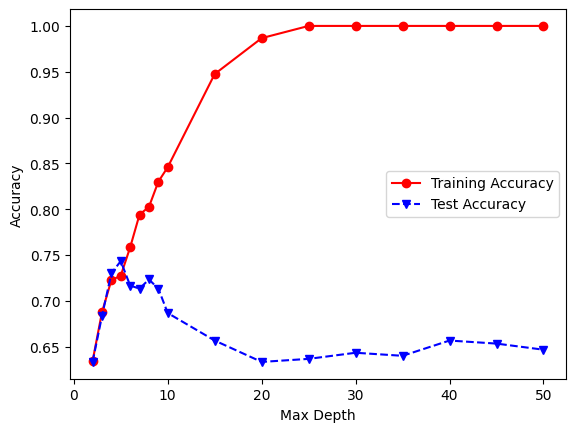

In [47]:
plt.plot(maxDepth, trainAcc, 'ro-', maxDepth, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

In [48]:
#Que the data that using here X,y build and explain linear regression model(which manipulation have you done to make it fit using python and excel)

In [ ]:
# prompt: how can i download the above dataset

import pandas as pd

# Create a Pandas dataframe from the provided data
df = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'y': y
})

# Save the dataframe to a CSV file
df.to_csv('data.csv', index=False)

# Download the CSV file
files.download('data.csv')


In [49]:
#Remove any rows with missing values.** This is important because linear regression cannot handle missing data.
import pandas as pd

In [50]:
# Load the data into a pandas DataFrame
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

In [51]:
# Drop any rows with missing data
df.dropna(inplace=True)

In [52]:
# Print the new DataFrame
print(df)


             x1         x2    y
0      3.080849  13.942046  1.0
1      4.838349  11.260021  1.0
2      8.641509  13.108116  1.0
3      4.539876  16.002288  1.0
4      3.601050  11.516514  1.0
...         ...        ...  ...
1495   1.781498   9.757320  0.0
1496   3.522866   0.883751  0.0
1497  17.108820   8.271010  0.0
1498   4.635229   4.479637  0.0
1499   7.450807   0.312600  0.0

[1500 rows x 3 columns]


In [53]:
#Normalize the data by subtracting the mean of each column from the values in that column and then dividing by the standard deviation of the column.
df['x1'] = (df['x1'] - df['x1'].mean()) / df['x1'].std()
df['x2'] = (df['x2'] - df['x2'].mean()) / df['x2'].std()

In [54]:
# Print the normalized DataFrame
print(df)

            x1        x2    y
0    -1.461963  0.641865  1.0
1    -1.100027  0.111906  1.0
2    -0.316813  0.477083  1.0
3    -1.161494  1.048962  1.0
4    -1.354834  0.162588  1.0
...        ...       ...  ...
1495 -1.729548 -0.185022  0.0
1496 -1.370935 -1.938409  0.0
1497  1.426925 -0.478712  0.0
1498 -1.141858 -1.227875  0.0
1499 -0.562024 -2.051267  0.0

[1500 rows x 3 columns]


In [57]:
#Create a new column that contains the product of the two original columns.
df['interaction'] = df['x1'] * df['x2']

In [58]:
# Print the new DataFrame
print(df)

            x1        x2    y  interaction
0    -1.462451  0.642079  1.0    -0.939009
1    -1.100394  0.111943  1.0    -0.123182
2    -0.316919  0.477242  1.0    -0.151247
3    -1.161882  1.049312  1.0    -1.219176
4    -1.355286  0.162643  1.0    -0.220427
...        ...       ...  ...          ...
1495 -1.730125 -0.185084  0.0     0.320219
1496 -1.371392 -1.939056  0.0     2.659206
1497  1.427401 -0.478872  0.0    -0.683542
1498 -1.142238 -1.228284  0.0     1.402993
1499 -0.562211 -2.051951  0.0     1.153630

[1500 rows x 4 columns]


In [59]:
#Fit a linear regression model to the data.
from sklearn.linear_model import LinearRegression

In [60]:
# Create a linear regression model
model = LinearRegression()

In [61]:
# Fit the model to the data
model.fit(df[['x1', 'x2', 'interaction']], df['y'])

LinearRegression()

In [62]:
# Print the model coefficients
print(model.coef_)

[-0.01629056  0.05882519 -0.01465068]


In [63]:
# Print the model intercept
print(model.intercept_)

0.5007071033194315


In [64]:
# Evaluate the model
print(model.score(df[['x1', 'x2', 'interaction']], df['y']))


0.015608774643612433


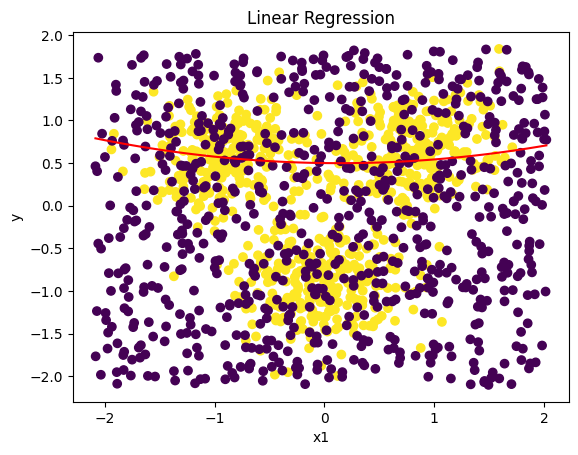

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data
plt.scatter(df['x1'], df['x2'], c=df['y'])

# Plot the linear regression line
x_vals = np.linspace(df['x1'].min(), df['x1'].max())
y_vals = model.intercept_ + model.coef_[0] * x_vals + model.coef_[1] * x_vals**2
plt.plot(x_vals, y_vals, color='red')

# Add labels and title
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Linear Regression')

# Show the plot
plt.show()

In [71]:
#For the Excel part
import pandas as pd

# Create a Pandas dataframe from the provided data
df = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'y': y
})

# Save the dataframe to a CSV file
df.to_csv('data.csv', index=False)

from google.colab import files

# Download the CSV file
files.download('data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>